In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pymongo
from pymongo import MongoClient
client = MongoClient()

In [2]:
db = client.fantasy_football

In [4]:
collection = db.teams
collection.find_one({})#,{"history":1})

{'_id': ObjectId('590481183863452abf32c68a'),
 'code': 3,
 'current_event_fixture': [{'day': 13,
   'event_day': 2,
   'id': 366,
   'is_home': False,
   'month': 5,
   'opponent': 14},
  {'day': 16,
   'event_day': 5,
   'id': 331,
   'is_home': True,
   'month': 5,
   'opponent': 15}],
 'draw': 0,
 'form': None,
 'id': 1,
 'link_url': '',
 'loss': 0,
 'name': 'Arsenal',
 'next_event_fixture': [{'day': 21,
   'event_day': 1,
   'id': 371,
   'is_home': True,
   'month': 5,
   'opponent': 6}],
 'played': 0,
 'points': 0,
 'position': 0,
 'short_name': 'ARS',
 'strength': 4,
 'strength_attack_away': 1270,
 'strength_attack_home': 1310,
 'strength_defence_away': 1350,
 'strength_defence_home': 1340,
 'strength_overall_away': 1310,
 'strength_overall_home': 1260,
 'team_division': 1,
 'unavailable': False,
 'win': 0}

In [11]:
teams = []
for team in db["teams"].find():
    team["next_opponent"] = team["current_event_fixture"][0]["opponent"]
    teams.append(team)
teams = pd.DataFrame(teams)

In [13]:
pd.DataFrame(teams)

0     14
1      3
2      2
3     19
4      7
5     18
6      5
7     10
8     20
9      8
10    17
11    13
12    12
13     1
14    16
15    15
16    11
17     6
18     4
19     9
Name: next_opponent, dtype: int64

In [4]:
players = collection.find({},{"history":1})

In [5]:
player_dfs = {}
for i, player in enumerate(players):
    df = pd.DataFrame(player["history"])
    df.index = df["round"]
    player_dfs[i] = df

In [6]:
panel = pd.Panel(player_dfs)

In [7]:
panel[0].columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards'],
      dtype='object')

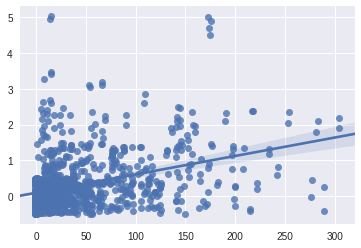

In [8]:
x = panel[:,:,["clearances_blocks_interceptions"]].sum(axis=1).astype(np.float64)
y = panel[:,:,["errors_leading_to_goal", "errors_leading_to_goal_attempt"]].sum(axis=1).sum().astype(np.float64)
#xy += np.random.uniform(-0.5, 0.5, xy.shape)
sns.regplot(x.values.ravel(), y.values.ravel(), x_jitter=1, y_jitter=.5)

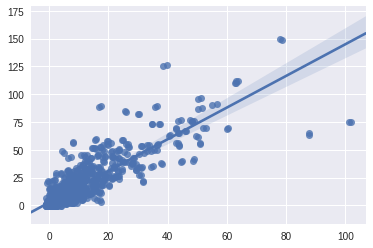

In [9]:
x = panel[:,:,["dribbles"]].sum(axis=1).astype(np.float64)
y = panel[:,:,["tackled"]].sum(axis=1).astype(np.float64)
#xy += np.random.uniform(-0.5, 0.5, xy.shape)
sns.regplot(x.values.ravel(), y.values.ravel(), x_jitter=1, y_jitter=1)

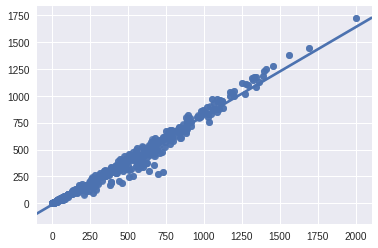

In [10]:
x = panel[:,:,["attempted_passes"]].sum(axis=1).astype(np.float64)
y = panel[:,:,["completed_passes"]].sum(axis=1).astype(np.float64)
#xy += np.random.uniform(-0.5, 0.5, xy.shape)
sns.regplot(x.values.ravel(), y.values.ravel(), x_jitter=1, y_jitter=1)

In [11]:
panel[273].columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards'],
      dtype='object')

In [12]:
panel.loc[:,:,"errors_leading_to_goal"].sum().add(panel.loc[:,:,"errors_leading_to_goal_attempt"].sum()).sort_values(ascending=False).head()

1030    5.0
681     5.0
410     5.0
1059    5.0
32      5.0
dtype: float64

In [13]:
panel.loc[:,:,"tackled"].sum().div(panel.loc[:,:,"minutes"].sum()).sort_values(ascending=False).head()

254     1.000000
903     1.000000
400     0.157895
1049    0.157895
908     0.125000
dtype: float64

In [14]:
panel.loc[:,:,"dribbles"].sum().div(panel.loc[:,:,"minutes"].sum()).sort_values(ascending=False).head(8)

80      0.333333
729     0.333333
1215    0.150000
566     0.150000
1213    0.085520
564     0.085520
448     0.076923
1097    0.076923
dtype: float64

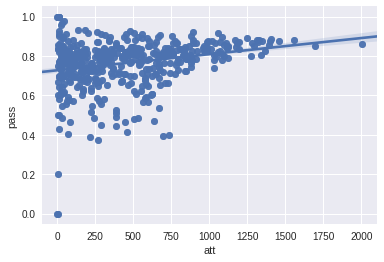

In [15]:
df = pd.DataFrame({"pass": panel.loc[:,:,"completed_passes"].sum().div(panel.loc[:,:,"attempted_passes"].sum()),
                   "att": panel.loc[:,:,"attempted_passes"].sum()})
sns.regplot(df["att"], df["pass"])

In [16]:
df.sort_values("att", ascending=False).dropna()

,att,pass
202,2002.0,0.861638
851,2002.0,0.861638
504,1692.0,0.851655
1153,1692.0,0.851655
912,1558.0,0.881258
263,1558.0,0.881258
727,1455.0,0.877663
78,1455.0,0.877663
401,1408.0,0.884943
1050,1408.0,0.884943


In [52]:
collection = db.player_details

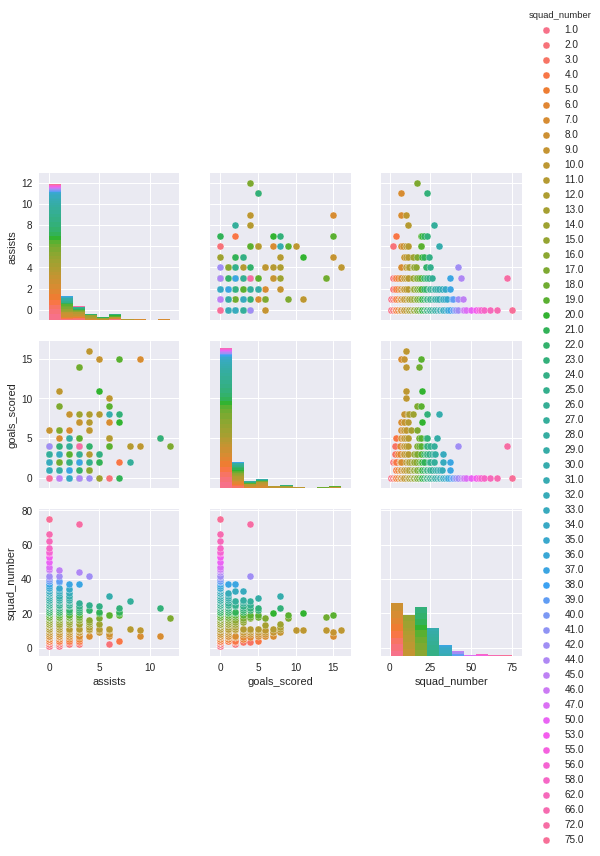

In [64]:
df = pd.DataFrame(collection.find_one({}, {"elements":1})["elements"])
df = df[df.minutes>0]
df.index = df.id
sns.pairplot(df[["assists", "goals_scored", "squad_number"]], hue="squad_number")

In [59]:
df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

In [66]:
list(collection.find_one({"elements.minutes": {"$gt": 1}}, {"elements":1})["elements"][0].keys())


['yellow_cards',
 'penalties_saved',
 'dreamteam_count',
 'transfers_in',
 'chance_of_playing_this_round',
 'id',
 'saves',
 'creativity',
 'value_form',
 'squad_number',
 'photo',
 'loaned_in',
 'event_points',
 'own_goals',
 'now_cost',
 'ep_next',
 'clean_sheets',
 'second_name',
 'status',
 'form',
 'transfers_in_event',
 'transfers_out',
 'selected_by_percent',
 'element_type',
 'team',
 'in_dreamteam',
 'assists',
 'points_per_game',
 'cost_change_event',
 'red_cards',
 'ea_index',
 'ep_this',
 'loans_in',
 'goals_conceded',
 'cost_change_start_fall',
 'news',
 'first_name',
 'chance_of_playing_next_round',
 'special',
 'web_name',
 'goals_scored',
 'minutes',
 'loaned_out',
 'value_season',
 'bonus',
 'total_points',
 'loans_out',
 'threat',
 'bps',
 'ict_index',
 'team_code',
 'transfers_out_event',
 'cost_change_start',
 'code',
 'influence',
 'penalties_missed',
 'cost_change_event_fall']